<a href="https://colab.research.google.com/github/SUSHOVAN95/ML-Assignments/blob/main/ASSGN4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.ft.txt.bz2 to test.ft.txt.bz2


In [ ]:
import pandas as pd
import numpy as np
import bz2
import re
import os
import matplotlib.pyplot as plt
import string
from collections import Counter 
from random import shuffle

In [ ]:
trainFile='test.ft.txt.bz2'
file=bz2.BZ2File(trainFile,'r')
lines=file.readlines()

In [ ]:
def getDocumentSentimentList(docs,splitStr='__label__'):
    docSentimentList=[]
    l = len(docs)
    for i in range(l):
        text=str(lines[i])
        splitText=text.split(splitStr)
        secHalf=splitText[1]
        text=secHalf[2:len(secHalf)-1]
        sentiment=secHalf[0]
        docSentimentList.append([text,sentiment])
    print('Done!!')
    return docSentimentList


List = getDocumentSentimentList(lines,splitStr='__label__')
df = pd.DataFrame(List,columns=["TEXT","SENTIMENT"])
df['SENTIMENT'].value_counts()

Done!!


2    200000
1    200000
Name: SENTIMENT, dtype: int64

In [ ]:
df['SENTIMENT'][df['SENTIMENT']=='1'] = 0
df['SENTIMENT'][df['SENTIMENT']=='2'] = 1

In [ ]:
coun = df.TEXT.str.count(' ')

df["COUNT"] = coun
df

In [ ]:
data = df[df.TEXT.str.count(' ')<25]
data

In [ ]:
X = data.iloc[:,0]
Y = data.iloc[:,1]
Y
xw = X.tolist()

In [ ]:
for i in range(len(xw)):
    table = str.maketrans({key: None for key in string.punctuation})
    xw[i] = xw[i].translate(table) 

xw

In [ ]:
SENWORD = []
def WordList(s):
    LIST = []
    for i in range(len(s)):
        a = s[i].split()
        a = a[:-1] #for omitting the \n
        a = [k.lower() for k in a]
        SENWORD.append(a)
        for j in range(len(a)):
            LIST.append(a[j])
    return LIST


L = WordList(xw)
print(len(L))
SENWORD
L
print(len(SENWORD))

548671
25768


In [ ]:
counts = Counter(L)
cou = pd.DataFrame.from_dict(counts, orient='index').reset_index()
cou = cou.rename(columns={'index':'event', 0:'count'})
cou

x = cou.iloc[:,0]
y = cou.iloc[:,1]


print(len(cou))

34601


In [ ]:
words = []
for i in range(len(cou)):
    if(y[i]>5):
        words.append(x[i])

print(len(words))

from random import shuffle
shuffle(words)

words

In [ ]:
SEN = []
for i in range(len(SENWORD)):
    W = []
    for j in range(len(SENWORD[i])):
        if(counts[SENWORD[i][j]]>5):
            W.append(SENWORD[i][j])
    SEN.append(W)
    
SEN

In [ ]:
A = [[0 for i in range(len(words))] for j in range(len(SENWORD))]

for i in range(len(SENWORD)):
   for j in range(len(SENWORD[i])):
       for k in range(len(words)):
           if(words[k]==SENWORD[i][j]):
              A[i][k] = A[i][j]+1
              break
              
A = pd.DataFrame(A)
A

,0,1,2,3,4,5,6,7,8,9,...,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
!pip install livelossplot

In [ ]:
Y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(A, Y, test_size = 0.10,random_state = 42)


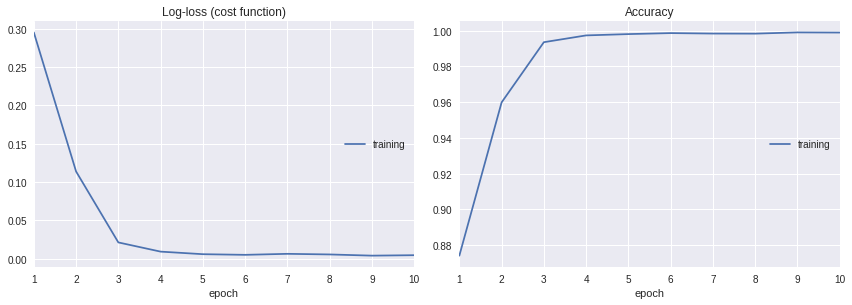

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from collections import Counter
from livelossplot import PlotLossesKeras

model = Sequential()
model.add(Dense(output_dim=2606,init='uniform',activation='relu',input_dim=5212))
model.add(Dense(output_dim=2606,init='uniform',activation='relu'))
model.add(Dense(output_dim=2606,init='uniform',activation='relu'))
model.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x=X_train, y=y_train, batch_size=32,epochs=10,callbacks=[PlotLossesKeras()],shuffle=True,verbose=1)


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7033507806117911
Test accuracy: 0.9057043073341094


In [ ]:
model.save('SENTIMENT_MODEL.h5')

In [ ]:
files.download('SENTIMENT_MODEL.h5') 
